In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = {
    'review': [
        "I love this product! It’s amazing and works perfectly.",
        "Terrible quality. Broke after one use.",
        "Very satisfied with my purchase. Highly recommend!",
        "Worst experience ever. Waste of money.",
        "Good value for the price.",
        "Not worth it. Completely disappointed.",
        "Excellent service and fantastic product.",
        "Bad product. Would not buy again.",
        "Absolutely wonderful! Exceeded my expectations.",
        "Poorly made and very cheap quality."
    ],
    'sentiment': [
        "positive", "negative", "positive", "negative", "positive",
        "negative", "positive", "negative", "positive", "negative"
    ]
}

df = pd.DataFrame(data)

In [4]:
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    return text

df['clean_review'] = df['review'].apply(preprocess_text)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'],
    df['sentiment'],
    test_size=0.3,
    random_state=42,
    stratify=df['sentiment']  # ensures balanced class distribution
)

In [10]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



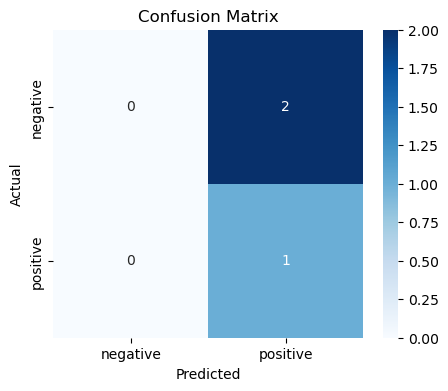

In [14]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()